In [1]:
import os
import sys

In [2]:
# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)

In [3]:
# WatChMaL imports
from io_utils.data_handling_3 import WCH5Dataset

# PyTorch imports
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Setup path to various files required by the new dataloader :

In [5]:
trainval_dset_path = "/fast_scratch/WatChMaL/data/IWCDmPMT_4pi_fulltank_9M_splits_CNN/IWCDmPMT_4pi_fulltank_9M_trainval.h5"
trainval_idx_path = "/fast_scratch/WatChMaL/data/IWCDmPMT_4pi_fulltank_9M_splits_CNN/IWCDmPMT_4pi_fulltank_9M_trainval_idxs.npz"

norm_params_path = "/fast_scratch/WatChMaL/data/IWCDmPMT_4pi_fulltank_9M_norm_params/IWCDmPMT_4pi_fulltank_9M_trainval_norm_params.npz"

Initialize the dataset object :

In [6]:
dset = WCH5Dataset(trainval_dset_path, trainval_idx_path, norm_params_path,
                   chrg_norm="identity", time_norm="tanh_minus_mode_divided_by_log_FWHM",
                   shuffle=1, reduced_dataset_size=50000, seed=42)

Initialize torch dataloader object using the dataset object :

In [7]:
# Dataloader parameters
train_batch_size = 256
val_batch_size = 256

In [8]:
train_loader = DataLoader(dset, batch_size=train_batch_size, shuffle=False,
                          pin_memory=True, sampler=SubsetRandomSampler(dset.train_indices))

val_loader = DataLoader(dset, batch_size=val_batch_size, shuffle=False,
                        pin_memory=True, sampler=SubsetRandomSampler(dset.val_indices))

Iterate over the DataLoader object and extract samples

In [9]:
event_charges = []
event_timings = []

norm_event_charges = []
norm_event_timings = []

labels = []
energies = []

train_iter = iter(train_loader)

for i in range(100):
    
    try:
        data = next(train_iter)
    except StopIteration:
        train_iter = iter(train_loader)
        data = next(train_iter)
        
    event_charges.append(data[0][:,:,:,:19].numpy())
    event_timings.append(data[0][:,:,:,19:].numpy())
    
    norm_event_charges.append(data[1][:,:,:,:19].numpy())
    norm_event_timings.append(data[1][:,:,:,19:].numpy())
    
    labels.append(data[2].numpy())
    energies.append(data[3].numpy())

Plot the distributions of the normalized events

In [10]:
print(len(event_charges), event_charges[0].shape, len(event_timings), event_timings[0].shape)
print(len(norm_event_charges), norm_event_charges[0].shape, len(norm_event_timings), norm_event_timings[0].shape)
print(len(labels), labels[0].shape, len(energies), energies[0].shape)

100 (256, 40, 40, 19) 100 (256, 40, 40, 19)
100 (256, 40, 40, 19) 100 (256, 40, 40, 19)
100 (256,) 100 (256, 1)


In [11]:
event_charges = np.concatenate(event_charges, axis=0)
event_timings = np.concatenate(event_timings, axis=0)

norm_event_charges = np.concatenate(norm_event_charges, axis=0)
norm_event_timings = np.concatenate(norm_event_timings, axis=0)

labels = np.concatenate(labels, axis=0)
energies = np.concatenate(energies, axis=0)

In [12]:
print(norm_event_charges.shape, norm_event_timings.shape, event_charges.shape, event_timings.shape, labels.shape, energies.shape)

(25600, 40, 40, 19) (25600, 40, 40, 19) (25600, 40, 40, 19) (25600, 40, 40, 19) (25600,) (25600, 1)


In [13]:
label_dict = {0:["gamma", "red"], 1:["e", "blue"], 2:["mu", "green"]}

Plot the charge distribution of the normalized events

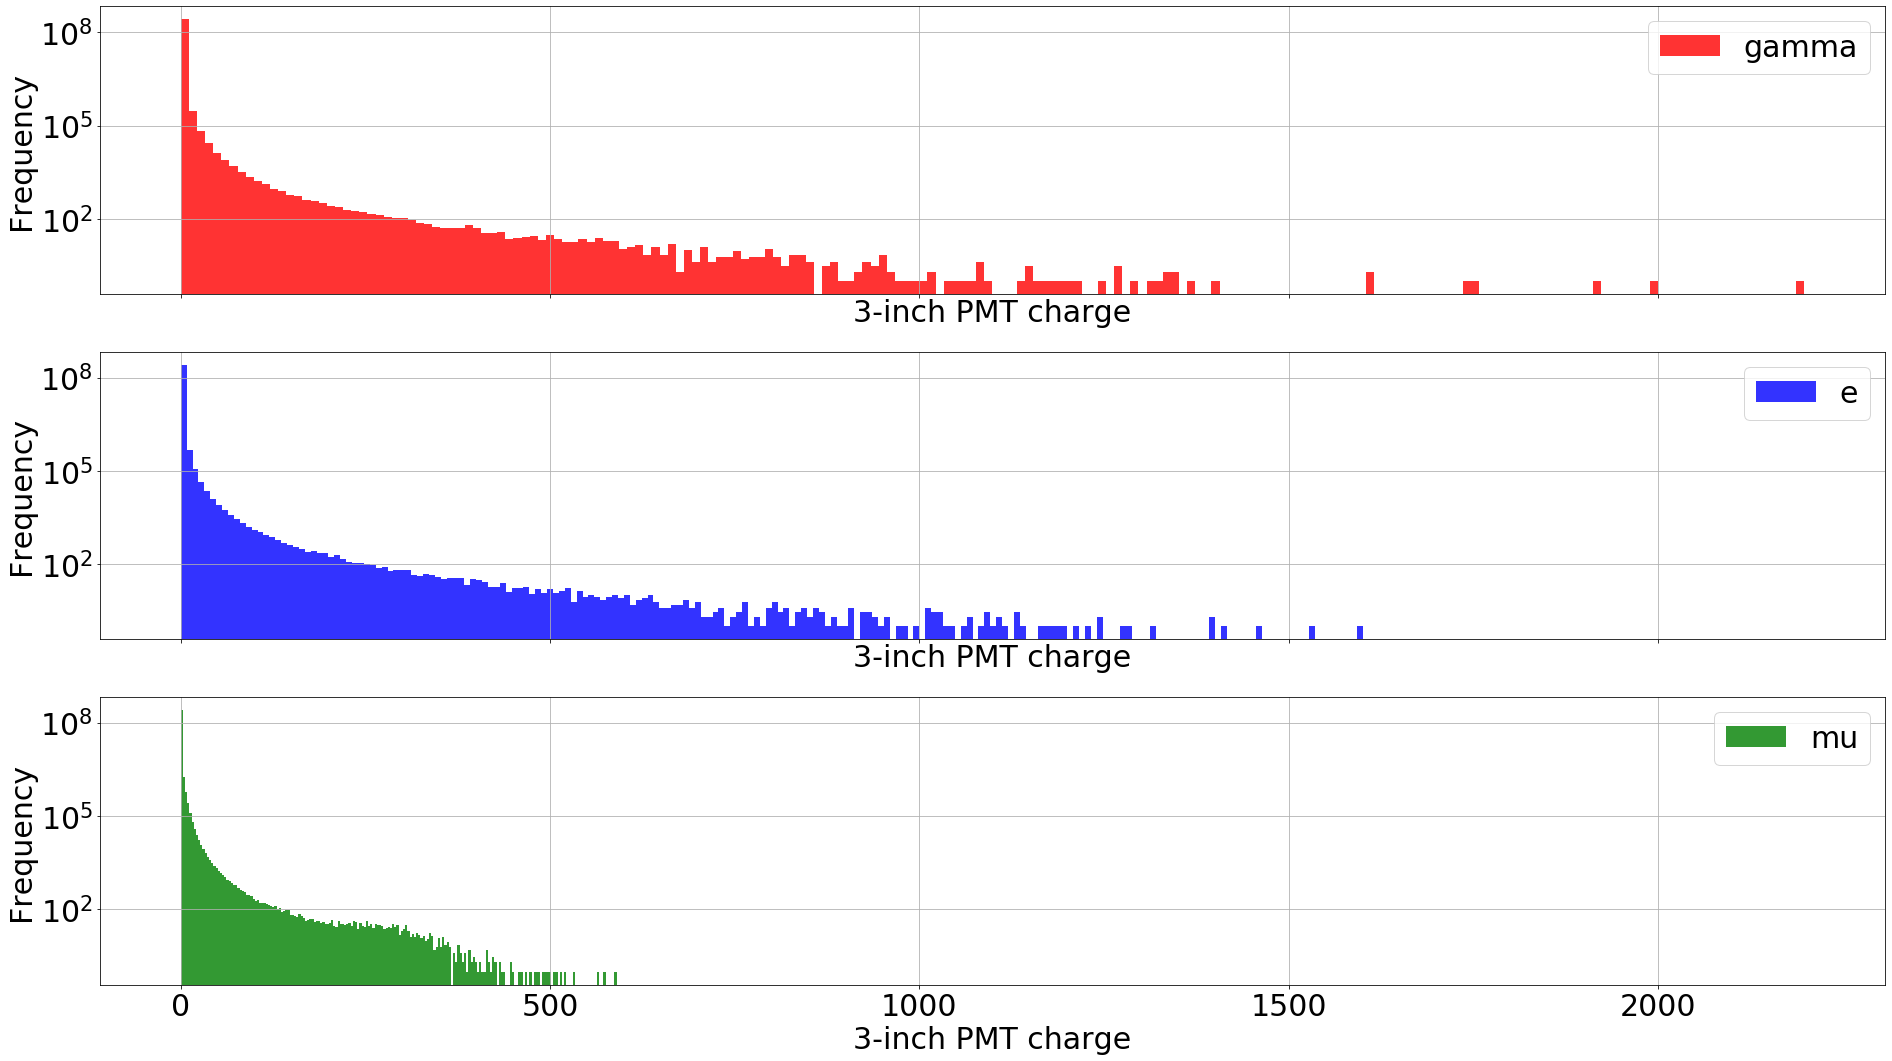

In [14]:
event_charge_dict = {}
for label in label_dict.keys():
    event_charge_dict[label] = event_charges[labels == label].reshape(-1)
    
fig, axes = plt.subplots(3, 1, figsize=(32,18), sharex=True)

for label in label_dict.keys():
    axes[label].hist(event_charge_dict[label], bins=200, density=False, label=label_dict[label][0], alpha=0.8,
                     color=label_dict[label][1])
    axes[label].legend(prop={"size":30})
    axes[label].set_xlabel("3-inch PMT charge", fontsize=30)
    axes[label].set_ylabel("Frequency", fontsize=30)
    axes[label].tick_params(axis="both", labelsize=30)
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_yscale("log")

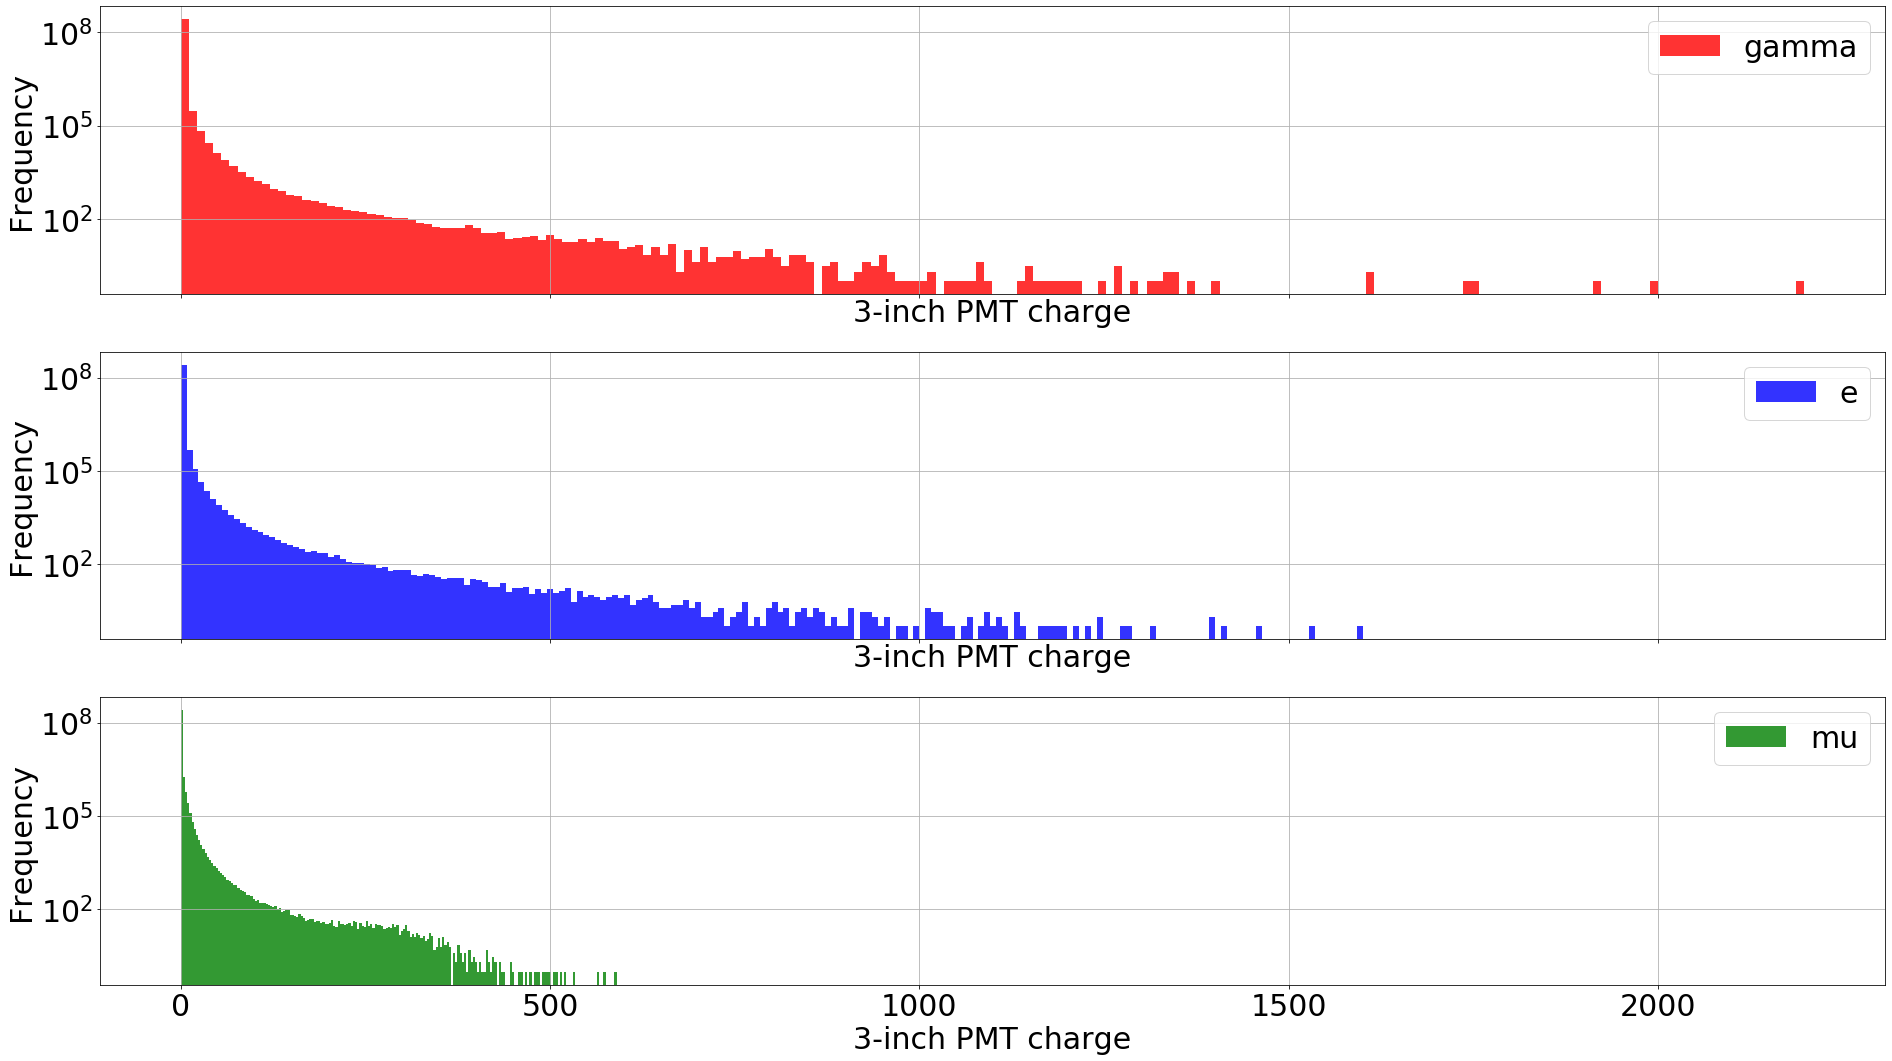

In [15]:
event_charge_dict = {}
for label in label_dict.keys():
    event_charge_dict[label] = norm_event_charges[labels == label].reshape(-1)
    
fig, axes = plt.subplots(3, 1, figsize=(32,18), sharex=True)

for label in label_dict.keys():
    axes[label].hist(event_charge_dict[label], bins=200, density=False, label=label_dict[label][0], alpha=0.8,
                     color=label_dict[label][1])
    axes[label].legend(prop={"size":30})
    axes[label].set_xlabel("3-inch PMT charge", fontsize=30)
    axes[label].set_ylabel("Frequency", fontsize=30)
    axes[label].tick_params(axis="both", labelsize=30)
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_yscale("log")

Plot the timing distribution of the normalized events

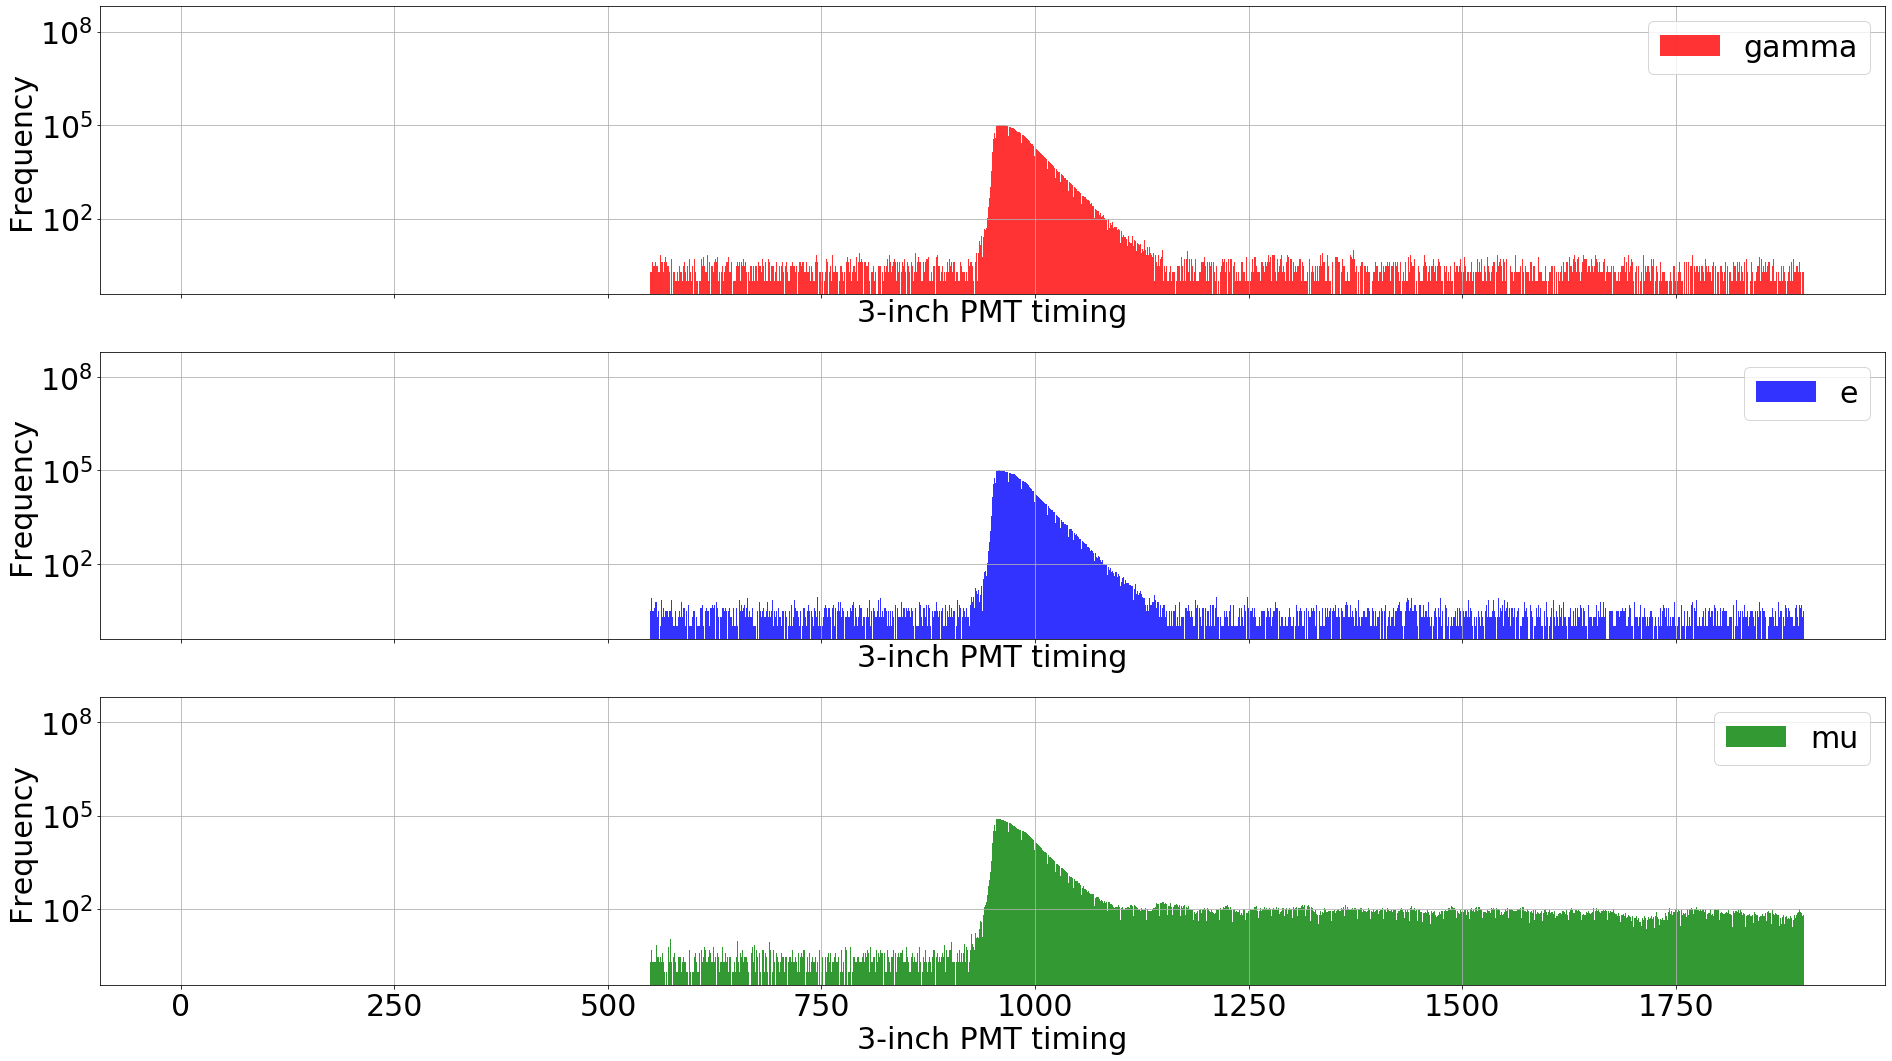

In [18]:
event_timing_dict = {}
for label in label_dict.keys():
    event_timing_dict[label] = event_timings[labels == label].reshape(-1)
    
fig, axes = plt.subplots(3, 1, figsize=(32,18), sharex=True)

for label in label_dict.keys():
    axes[label].hist(event_timing_dict[label], bins=10000, density=False, label=label_dict[label][0], alpha=0.8,
                     color=label_dict[label][1])
    axes[label].legend(prop={"size":30})
    axes[label].set_xlabel("3-inch PMT timing", fontsize=30)
    axes[label].set_ylabel("Frequency", fontsize=30)
    axes[label].tick_params(axis="both", labelsize=30)
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_yscale("log")

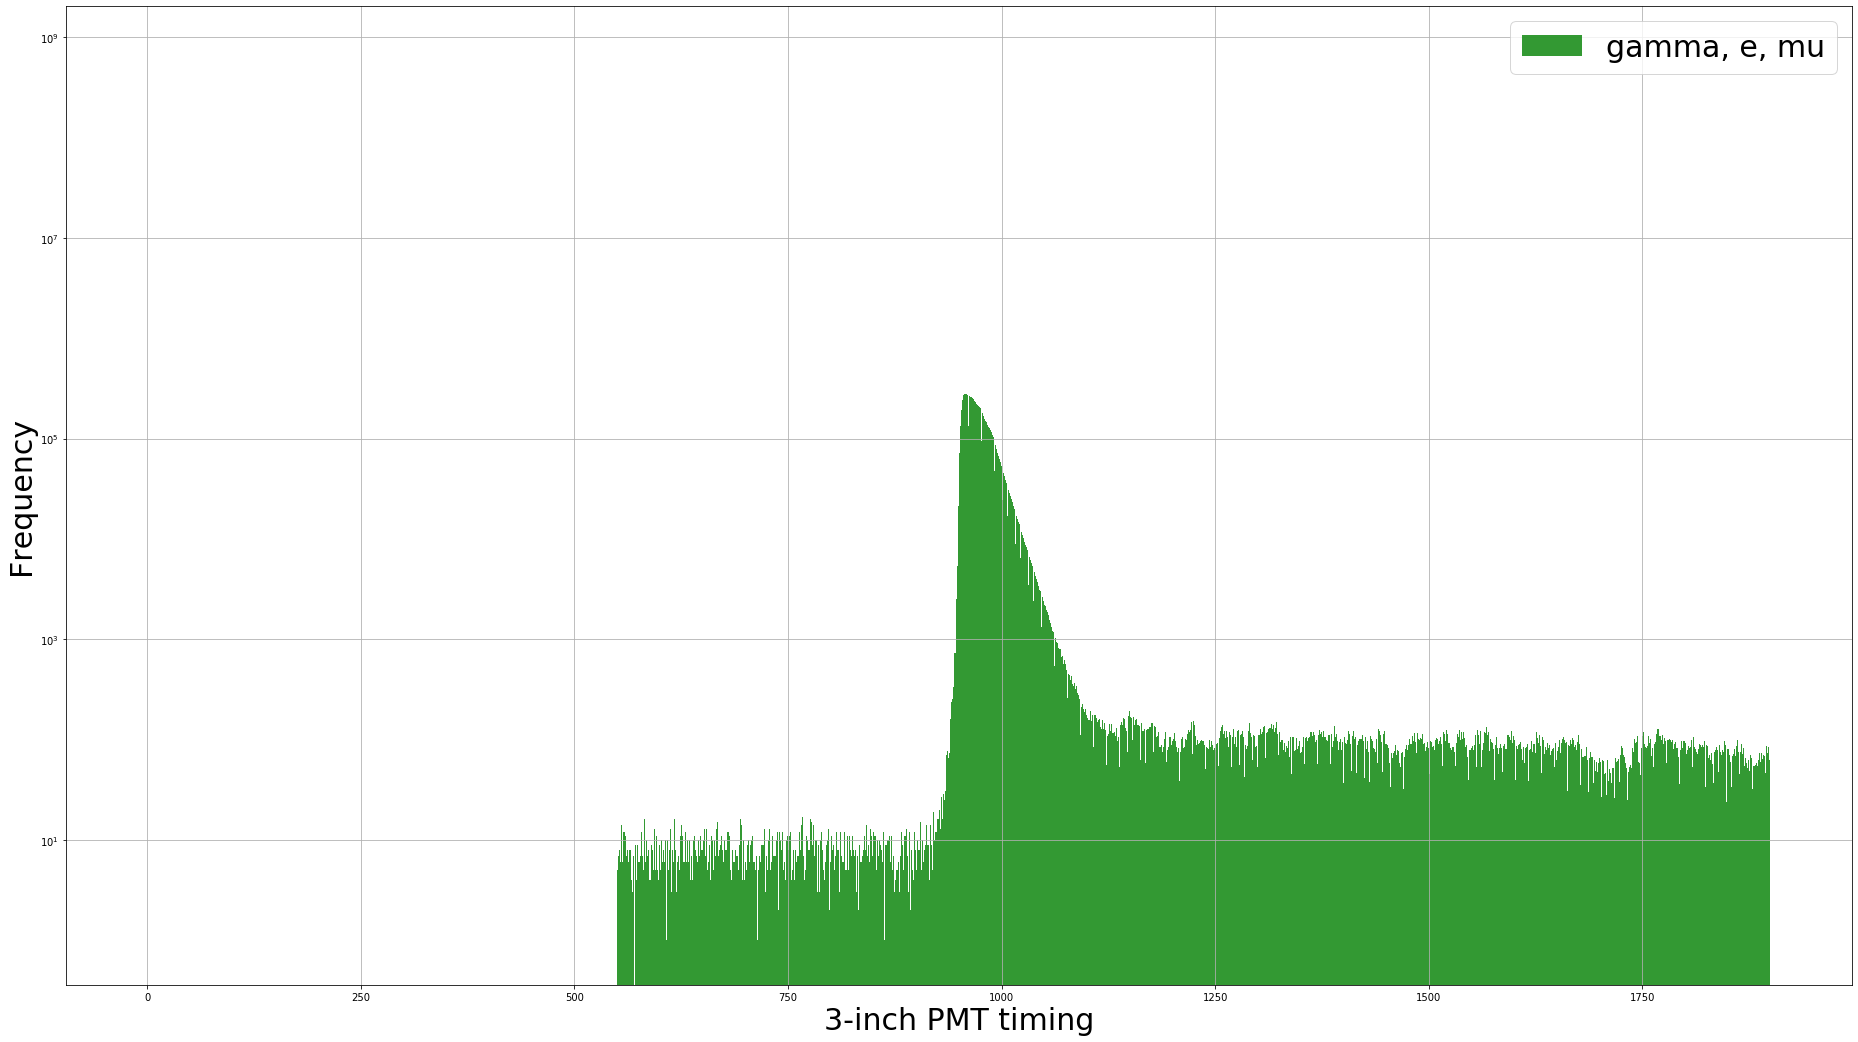

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(32,18), sharex=True)

plt.hist(event_timings.reshape(-1), bins=10000, density=False, label="gamma, e, mu", alpha=0.8,
                 color=label_dict[label][1])
plt.legend(prop={"size":30})
plt.xlabel("3-inch PMT timing", fontsize=30)
plt.ylabel("Frequency", fontsize=30)
plt.grid(True, which="both", axis="both")
plt.yscale("log")

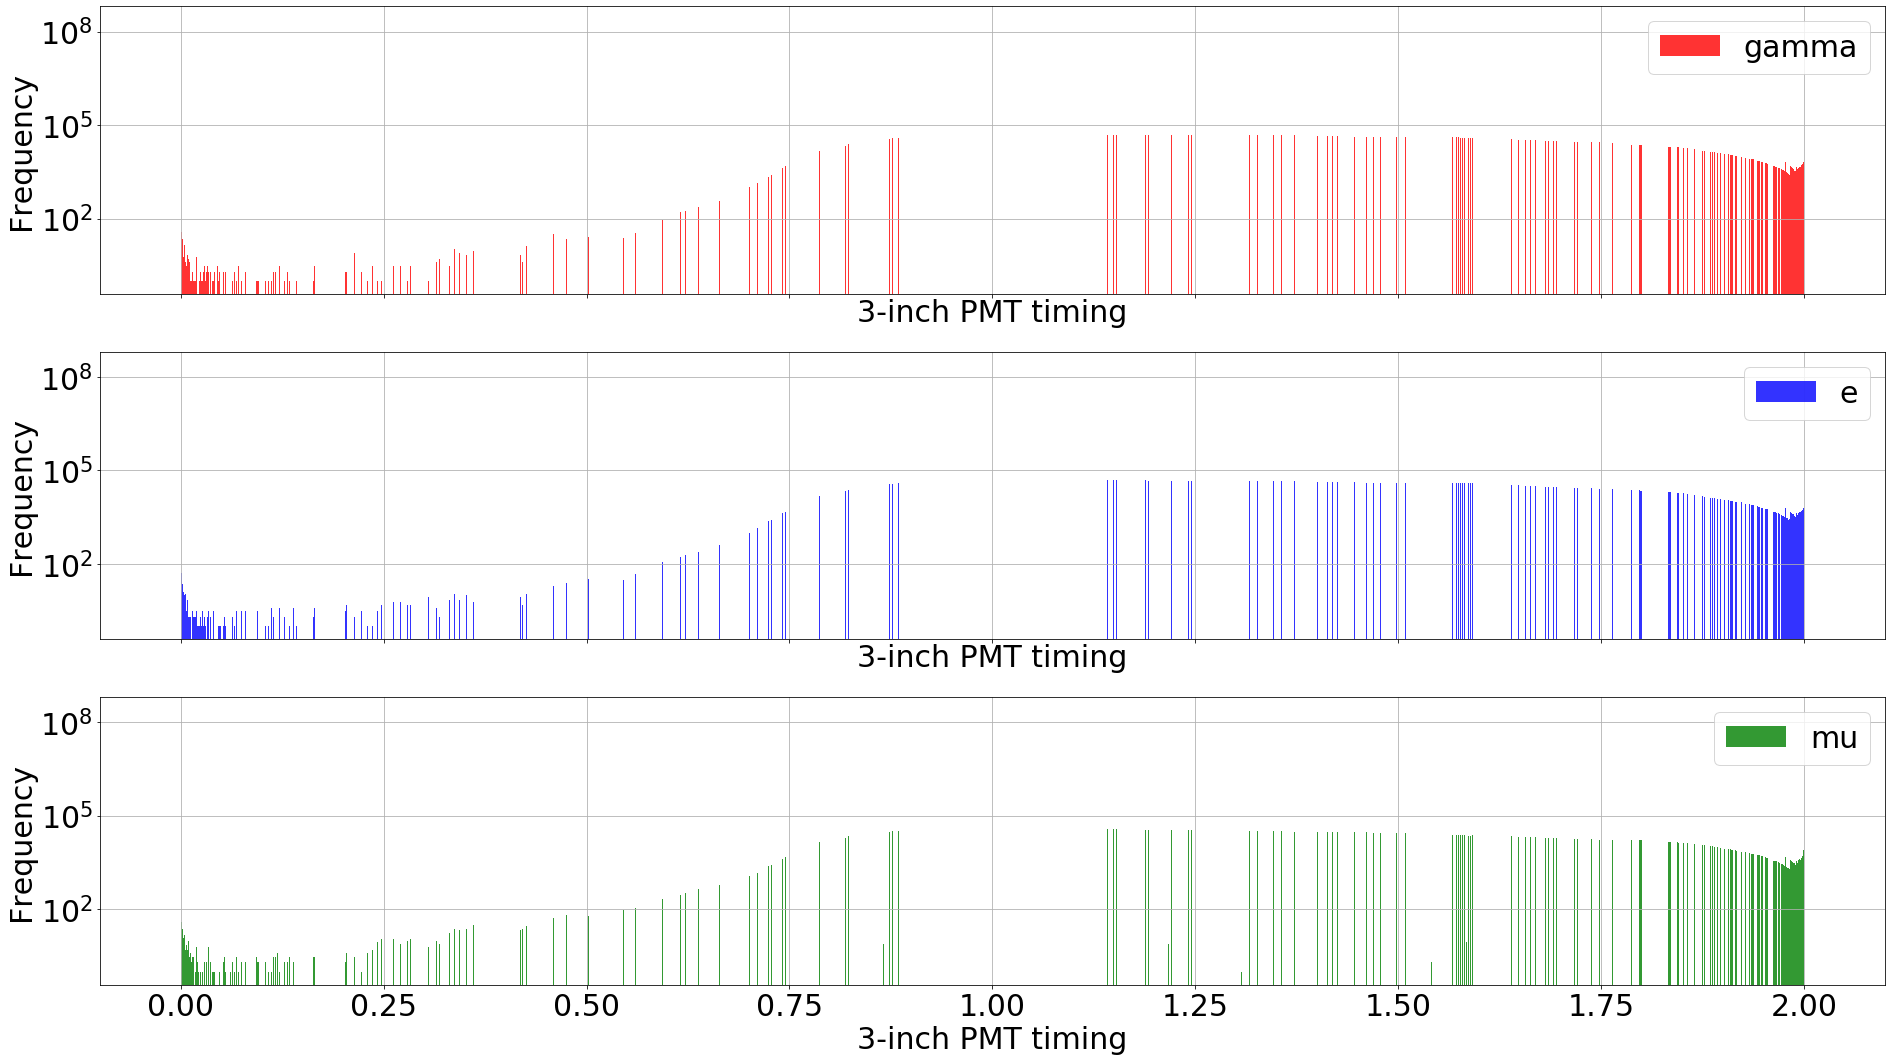

In [19]:
event_timing_dict = {}
for label in label_dict.keys():
    event_timing_dict[label] = norm_event_timings[labels == label].reshape(-1)
    
fig, axes = plt.subplots(3, 1, figsize=(32,18), sharex=True)

for label in label_dict.keys():
    axes[label].hist(event_timing_dict[label], bins=10000, density=False, label=label_dict[label][0], alpha=0.8,
                     color=label_dict[label][1])
    axes[label].legend(prop={"size":30})
    axes[label].set_xlabel("3-inch PMT timing", fontsize=30)
    axes[label].set_ylabel("Frequency", fontsize=30)
    axes[label].tick_params(axis="both", labelsize=30)
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_yscale("log")

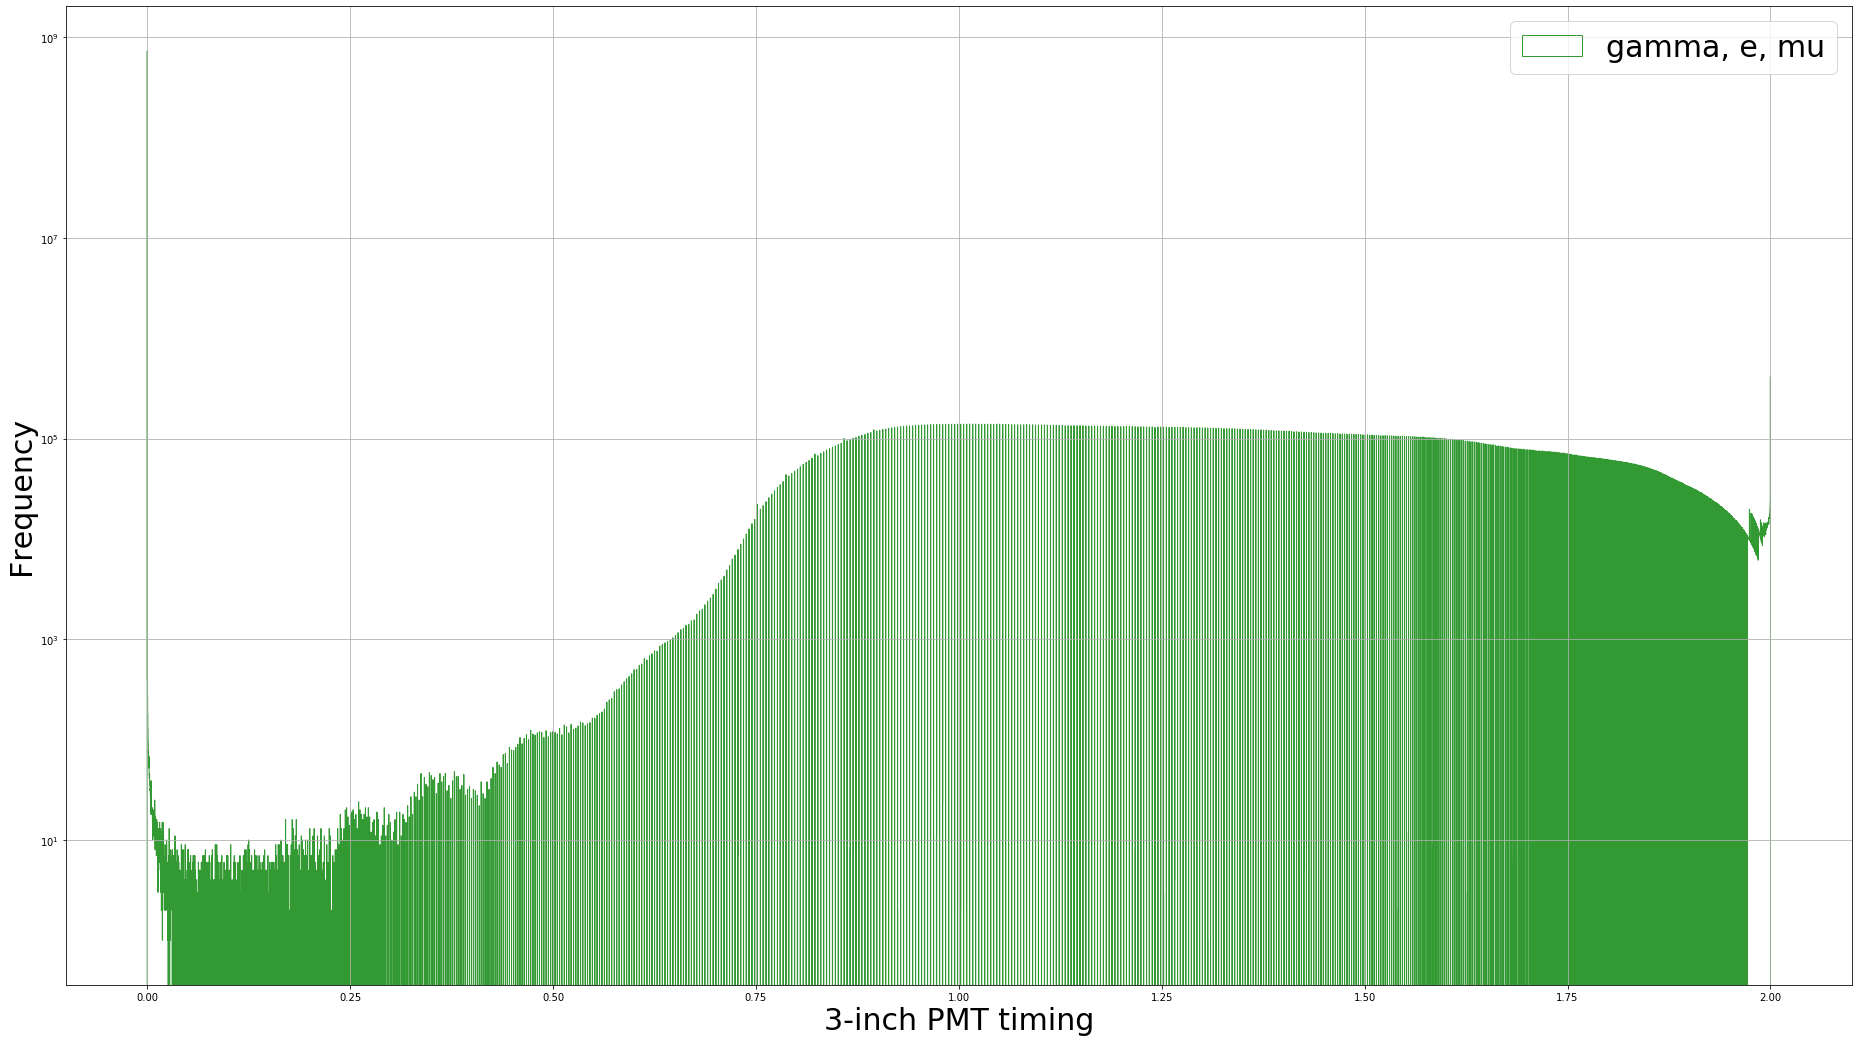

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(32,18), sharex=True)

plt.hist(norm_event_timings.reshape(-1), bins=10000, density=False, label="gamma, e, mu", alpha=0.8,
                 color=label_dict[label][1], histtype="step")
plt.legend(prop={"size":30})
plt.xlabel("3-inch PMT timing", fontsize=30)
plt.ylabel("Frequency", fontsize=30)
plt.grid(True, which="both", axis="both")
plt.yscale("log")